<a href="https://colab.research.google.com/github/tejaspatni/Disease-Prediction-Classification-ML-Model/blob/main/Disease_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


Given a dataset containing information about patients who have been tested for a particular disease. Your task is to build a binary classification model that predicts whether a patient has the disease or not based on the provided features.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kohlas/dataset.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,Female,112,Low,High,No
1,25,Male,130,Low,High,No
2,19,Female,151,High,High,Yes
3,65,Female,98,Low,Low,No
4,35,Female,132,Low,Low,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(5000, 6)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5000 non-null   int64 
 1   Gender          5000 non-null   object
 2   Blood Pressure  5000 non-null   int64 
 3   Cholesterol     5000 non-null   object
 4   Blood Sugar     5000 non-null   object
 5   Disease         5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Age               0
Gender            0
Blood Pressure    0
Cholesterol       0
Blood Sugar       0
Disease           0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol', 'Blood Sugar',
       'Disease'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,Age,Blood Pressure
count,5000.000000,5000.000000
mean,46.226200,124.565400
std,16.263712,20.043025
min,18.000000,90.000000
25%,33.000000,107.000000
50%,46.000000,125.000000
75%,60.000000,142.000000
max,74.000000,159.000000


### Variables Description 

●	Age: Age of the patient (numeric)

●	Gender: Gender of the patient (categorical: Male/Female)

●	Blood Pressure: Blood pressure of the patient (numeric)

●	Cholesterol: Cholesterol level of the patient (categorical: High/Low)

●	Blood Sugar: Blood sugar level of the patient (categorical: High/Low)

●	Disease: Whether the patient has the disease or not (binary: Yes/No)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
dataset.nunique()

Age               57
Gender             2
Blood Pressure    70
Cholesterol        2
Blood Sugar        2
Disease            2
dtype: int64

From the Dataset, we have found that:
1. The dataset consists of 5000 rows and 6 columns
2. There is no null or missing values in the dataset
3. There are 5 Independent and 1 dependent variable
4. From Independent variable, 3 consists of categorical variable
5. The target or dependent variable consists of binary classification having 'Yes' and 'No'

## ***3. EDA***

In [ ]:
df = dataset.copy()

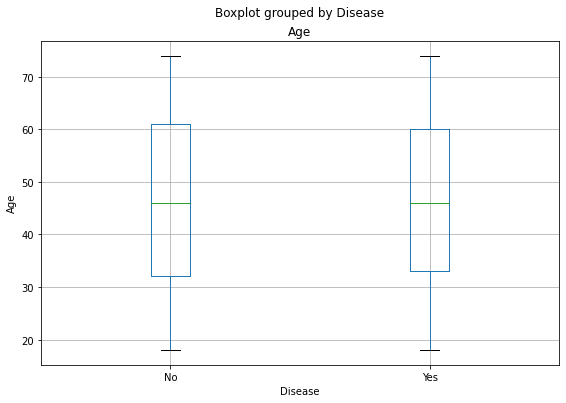

In [ ]:
# Chart visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'Age', by = 'Disease', ax = ax)
ax.set_ylabel("Age")
plt.show()

From the above plot, we can say Person of every age has either the disease or not

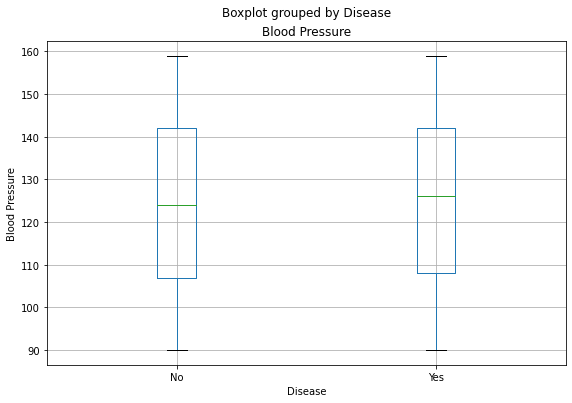

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'Blood Pressure', by = 'Disease', ax = ax)
ax.set_ylabel("Blood Pressure")
plt.show()

From the above plot, we can say either person having a high or low blood pressure doesn't define the disease

In [ ]:
data_1= df.groupby(['Gender','Disease']).size().reset_index(name='count')
data_1

,Gender,Disease,count
0,Female,No,1291
1,Female,Yes,1216
2,Male,No,1232
3,Male,Yes,1261


<AxesSubplot:xlabel='Gender', ylabel='count'>

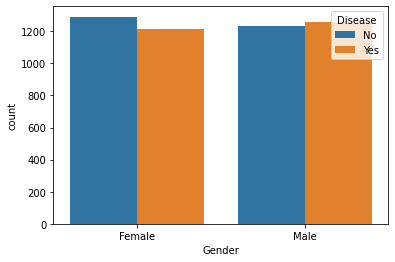

In [ ]:
sns.barplot(x='Gender', y='count', hue='Disease', data=data_1)

In [ ]:
data_2= df.groupby(['Cholesterol','Disease']).size().reset_index(name='count')
data_2

,Cholesterol,Disease,count
0,High,No,1294
1,High,Yes,1290
2,Low,No,1229
3,Low,Yes,1187


<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

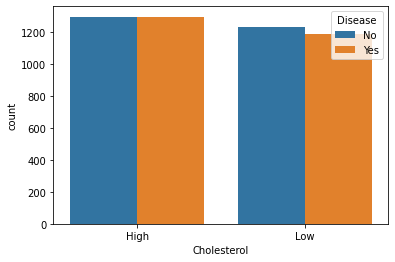

In [ ]:
sns.barplot(x='Cholesterol', y='count', hue='Disease', data=data_2)

In [ ]:
data_3= df.groupby(['Blood Sugar','Disease']).size().reset_index(name='count')
data_3

,Blood Sugar,Disease,count
0,High,No,1269
1,High,Yes,1269
2,Low,No,1254
3,Low,Yes,1208


<AxesSubplot:xlabel='Blood Sugar', ylabel='count'>

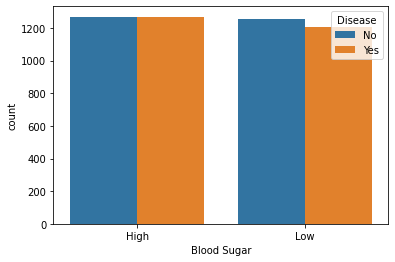

In [ ]:
sns.barplot(x='Blood Sugar', y='count', hue='Disease', data=data_3)

The disease Count of having or not having disease vary evenly in gender,Cholesterol level or blood sugar.
We can say the data is quite balanced

##***4. Data Wrangling***

In [ ]:
# Write your code to make your dataset analysis ready.
df['Disease'] = df['Disease'].apply(lambda x : 1 if x == "Yes" else 0)
df.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,Female,112,Low,High,0
1,25,Male,130,Low,High,0
2,19,Female,151,High,High,1
3,65,Female,98,Low,Low,0
4,35,Female,132,Low,Low,1


In [ ]:
df['Disease'].value_counts()

0    2523
1    2477
Name: Disease, dtype: int64

We assign our target variable having Yes as 1 and No as 0

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
# Encode your categorical columns
dummies = pd.get_dummies(df)
dummies.head()

,Age,Blood Pressure,Disease,Gender_Female,Gender_Male,Cholesterol_High,Cholesterol_Low,Blood Sugar_High,Blood Sugar_Low
0,58,112,0,1,0,0,1,1,0
1,25,130,0,0,1,0,1,1,0
2,19,151,1,1,0,1,0,1,0
3,65,98,0,1,0,0,1,0,1
4,35,132,1,1,0,0,1,0,1


We did the One hot encoding for the Categorical Variables

### 2. Data Scaling

In [ ]:
# Scaling your data
# create scaler object and fit to data
scaler = MinMaxScaler()
scaler.fit(dummies)

# transform data
scaled_data = scaler.transform(dummies)

# create dataframe from scaled data
df_scaled = pd.DataFrame(scaled_data, columns=dummies.columns)
df_scaled.head()

,Age,Blood Pressure,Disease,Gender_Female,Gender_Male,Cholesterol_High,Cholesterol_Low,Blood Sugar_High,Blood Sugar_Low
0,0.714286,0.318841,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.125000,0.579710,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.017857,0.884058,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.839286,0.115942,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.303571,0.608696,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Through Min Max Scaling, We convert the numerical variable to have the same range of values 

### 3. Data Splitting

In [ ]:
# Dividing the Variables into Dependent and Independent variables
X = df_scaled.drop(['Disease'],axis=1)
y = df_scaled['Disease']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Split the data into training and testing set in the ratio of 80-20 split

## ***6. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
logreg = LogisticRegression()
# Fit the Algorithm
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_pred_l = logreg.predict(X_train)

In [ ]:
accuracy_train_l = accuracy_score(y_train, y_train_pred_l)
print('Accuracy_Train:', accuracy_train_l)

Accuracy_Train: 0.50975


In [ ]:
# Predict on the model
y_pred_l = logreg.predict(X_test)

In [ ]:
# Evaluation Metric Score
accuracy = accuracy_score(y_test, y_pred_l)
precision = precision_score(y_test, y_pred_l)
recall = recall_score(y_test, y_pred_l)
f1 = f1_score(y_test, y_pred_l)
confusion = confusion_matrix(y_test, y_pred_l)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:', confusion)

Accuracy: 0.494
Precision: 0.48764044943820223
Recall: 0.4383838383838384
F1 score: 0.46170212765957447
Confusion matrix: [[277 228]
 [278 217]]


### ML Model - 2 - Random Forest

In [ ]:
# ML Model - 1 Implementation
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred_r = rf.predict(X_train)

In [ ]:
accuracy_r = accuracy_score(y_train, y_train_pred_r)
print("Accuracy_train:", accuracy_r)

Accuracy_train: 0.971


In [ ]:
roc_auc_score(y_train, y_train_pred_r)

0.971060655913129

In [ ]:
# Predict the class labels for the testing data
y_pred_r = rf.predict(X_test)

In [ ]:
# Evaluation Metric Score
accuracy = accuracy_score(y_test, y_pred_r)
precision = precision_score(y_test, y_pred_r)
recall = recall_score(y_test, y_pred_r)
f1 = f1_score(y_test, y_pred_r)
conf_matrix = confusion_matrix(y_test, y_pred_r)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion Matrix:", conf_matrix)

Accuracy: 0.498
Precision: 0.49269311064718163
Recall: 0.4767676767676768
F1 score: 0.48459958932238195
Confusion Matrix: [[262 243]
 [259 236]]


In [ ]:
roc_auc_score(y_test, y_pred_r)

0.4977897789778978

In training, it is creating an accuracy of 97% but in testing, it lowers down to 49.8% which clearly indicates that model is overfitting.

We can Cross-validate and tune the parameters to prevent overfitting

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
classifier = RandomForestClassifier()
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
roc_auc_score(y_train,train_preds)

0.542314427468625

In [ ]:
# Evaluation Metric Score
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
conf_matrix = confusion_matrix(y_test, test_preds)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion Matrix:", conf_matrix)

Accuracy: 0.472
Precision: 0.4656964656964657
Recall: 0.45252525252525255
F1 score: 0.459016393442623
Confusion Matrix: [[248 257]
 [271 224]]


In [ ]:
roc_auc_score(y_test,test_preds)

0.4718071807180718

# **Conclusion**

The Conclusion we generated from the models:
1. Both the model is not good at predicting the disease as they have an accuracy of almost 50% each.
2. Logitic regression is better than random forest
3. Random forest generate model of overfitting which is not good to prediction even after cross validation.
